In [ ]:
# !pip install torch torchvision torchaudio

In [39]:
import torch
import torch.nn as nn
import torch.optim as  optim 
import torch.nn.functional as F
from torchvision import datasets, transforms

In [41]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_dataset = datasets.MNIST(root = './data', train = True, transform = transform, download = True)
test_dataset = datasets.MNIST(root = './data', train = False, transform = transform, download = True)

In [43]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = False)

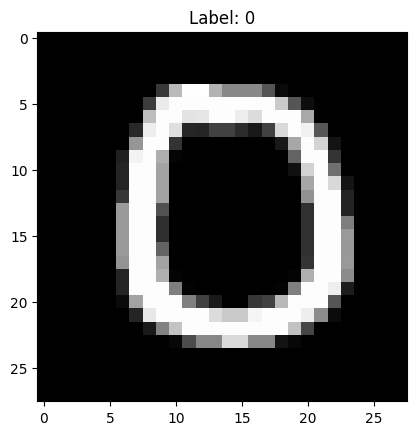

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def show_random_image():
    data_iter = iter(train_loader)
    images, labels = next(data_iter)

    random_index = np.random.randint(0, len(images))  
    random_image = images[random_index]  
    label = labels[random_index]  

    random_image = random_image.squeeze().numpy()  

    plt.imshow(random_image, cmap='gray')
    plt.title(f"Label: {label.item()}")
    plt.show()

show_random_image()

In [47]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        self.fc1 = nn.Linear(28*28,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
    
    def forward(self,x):
        x = x.view(-1,28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [49]:
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [55]:
epochs = 5

train_losses = []
train_accuracies = []

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

Epoch 1/5, Loss: 0.1860, Accuracy: 94.44%
Epoch 2/5, Loss: 0.1386, Accuracy: 95.73%
Epoch 3/5, Loss: 0.1100, Accuracy: 96.57%
Epoch 4/5, Loss: 0.0940, Accuracy: 97.03%
Epoch 5/5, Loss: 0.0835, Accuracy: 97.32%


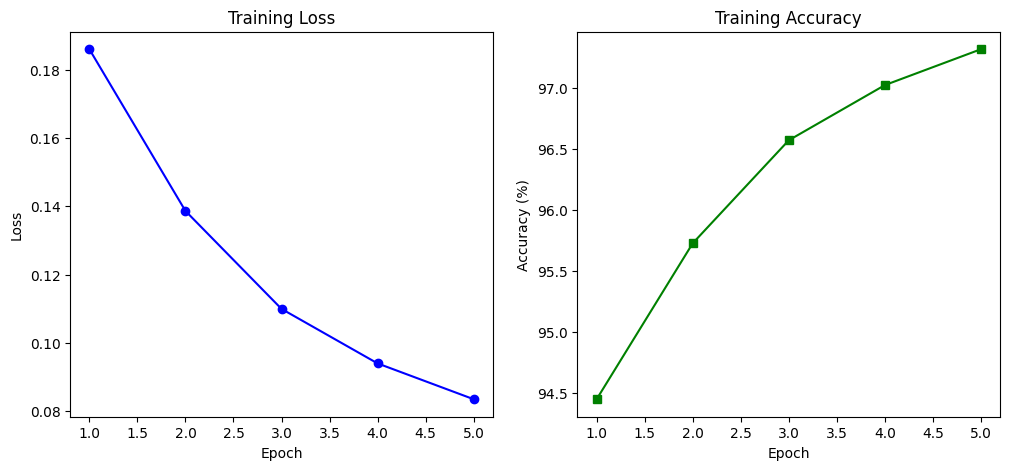

In [71]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, marker='s', linestyle='-', color='g')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy")

plt.show()

In [73]:
correct = 0
total = 0

with torch.no_grad():  
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 97.83%
